# Introduction
<hr style="border:2px solid black"> </hr>

<div class="alert alert-warning">
<font color=black>

**What?** Autoencoder Feature Extraction for Regression

</font>
</div>

# Autoencoder and feature extraction
<hr style="border:2px solid black"> </hr>

<div class="alert alert-info">
<font color=black>

- An autoencoder is composed of an encoder and a decoder sub-models. The encoder compresses the input and the decoder attempts to recreate the input from the compressed version provided by the encoder. 
- After training, the encoder model is saved and the decoder is **discarded**.
- The encoder can then be used as a data preparation technique to **perform feature extraction** on raw data that can be used to train a different machine learning model.
- Recall thath the output of the model at the bottleneck is a fixed-length vector that provides a **compressed representation** of the input data.
- **To be more specific**: input data from the domain can then be provided to the model and the output of the model at the bottleneck can be used as a feature vector in a supervised learning model, for visualization, or more generally for dimensionality reduction.

</font>
</div>

# Import modules
<hr style="border:2px solid black"> </hr>

In [1]:
from sklearn.datasets import make_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot
from tensorflow.keras.models import load_model
from sklearn.svm import SVR
from matplotlib import rcParams
from sklearn.metrics import mean_absolute_error
# Getting rid of the warning messages
import warnings
warnings.filterwarnings("ignore")

# Create synthetic dataset
<hr style="border:2px solid black"> </hr>

In [2]:
# define dataset
X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1, random_state=1)
# number of input columns
n_inputs = X.shape[1]

# Split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# Scale data - good practice with MLPs
t = MinMaxScaler()
t.fit(X_train)
X_train = t.transform(X_train)
X_test = t.transform(X_test)
print(X_train.shape, X_test.shape)

(670, 100) (330, 100)


# Modelling
<hr style="border:2px solid black"> </hr>

<div class="alert alert-info">
<font color=black>

- It is generally said that in order to a better representation of the input we have to restrict the size of the bottleneck.
- **However**, we can keep the size the same and force the encoder to find an **alternative** representation within the sime dimension. Better representation results in better learning, the same reason we use data transforms on raw data, like scaling or power transforms.

</font>
</div>

In [3]:
# define encoder
visible = Input(shape=(n_inputs,))
e = Dense(n_inputs*2)(visible)
e = BatchNormalization()(e)
e = ReLU()(e)

# define bottleneck
n_bottleneck = n_inputs
bottleneck = Dense(n_bottleneck)(e)

# define decoder
d = Dense(n_inputs*2)(bottleneck)
d = BatchNormalization()(d)
d = ReLU()(d)

# output layer
output = Dense(n_inputs, activation='linear')(d)
# define autoencoder model
model = Model(inputs=visible, outputs=output)
# compile autoencoder model
model.compile(optimizer='adam', loss='mse')

In [4]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
dense (Dense)                (None, 200)               20200     
_________________________________________________________________
batch_normalization (BatchNo (None, 200)               800       
_________________________________________________________________
re_lu (ReLU)                 (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_2 (Dense)              (None, 200)               20200     
_________________________________________________________________
batch_normalization_1 (Batch (None, 200)               800   

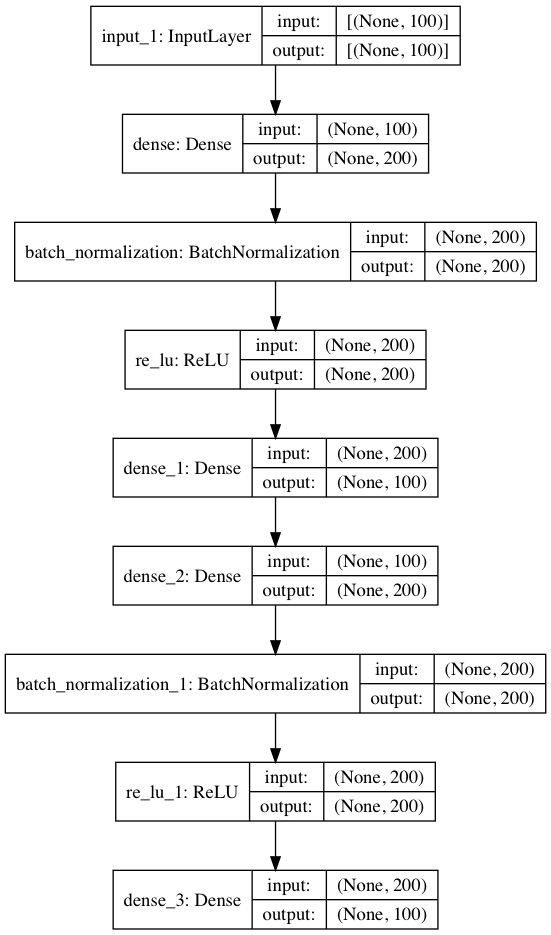

In [5]:
# plot the autoencoder
plot_model(model, show_shapes=True)

In [6]:
try:
    os.remove("./model.png")
except:
    pass

# Training
<hr style="border:2px solid black"> </hr>

In [7]:
# Fit the autoencoder model to reconstruct input
history = model.fit(X_train, X_train, epochs=400, batch_size=16, verbose=2, validation_data=(X_test,X_test))

Epoch 1/400
42/42 - 1s - loss: 0.3886 - val_loss: 0.1751
Epoch 2/400
42/42 - 0s - loss: 0.1448 - val_loss: 0.1407
Epoch 3/400
42/42 - 0s - loss: 0.0994 - val_loss: 0.1112
Epoch 4/400
42/42 - 0s - loss: 0.0791 - val_loss: 0.0850
Epoch 5/400
42/42 - 0s - loss: 0.0651 - val_loss: 0.0722
Epoch 6/400
42/42 - 0s - loss: 0.0554 - val_loss: 0.0640
Epoch 7/400
42/42 - 0s - loss: 0.0484 - val_loss: 0.0553
Epoch 8/400
42/42 - 0s - loss: 0.0424 - val_loss: 0.0491
Epoch 9/400
42/42 - 0s - loss: 0.0379 - val_loss: 0.0458
Epoch 10/400
42/42 - 0s - loss: 0.0352 - val_loss: 0.0444
Epoch 11/400
42/42 - 0s - loss: 0.0331 - val_loss: 0.0413
Epoch 12/400
42/42 - 0s - loss: 0.0302 - val_loss: 0.0417
Epoch 13/400
42/42 - 0s - loss: 0.0282 - val_loss: 0.0401
Epoch 14/400
42/42 - 0s - loss: 0.0268 - val_loss: 0.0383
Epoch 15/400
42/42 - 0s - loss: 0.0254 - val_loss: 0.0359
Epoch 16/400
42/42 - 0s - loss: 0.0242 - val_loss: 0.0347
Epoch 17/400
42/42 - 0s - loss: 0.0232 - val_loss: 0.0355
Epoch 18/400
42/42 - 0s

Epoch 142/400
42/42 - 0s - loss: 0.0050 - val_loss: 0.0085
Epoch 143/400
42/42 - 0s - loss: 0.0050 - val_loss: 0.0086
Epoch 144/400
42/42 - 0s - loss: 0.0050 - val_loss: 0.0086
Epoch 145/400
42/42 - 0s - loss: 0.0049 - val_loss: 0.0084
Epoch 146/400
42/42 - 0s - loss: 0.0049 - val_loss: 0.0082
Epoch 147/400
42/42 - 0s - loss: 0.0049 - val_loss: 0.0081
Epoch 148/400
42/42 - 0s - loss: 0.0048 - val_loss: 0.0080
Epoch 149/400
42/42 - 0s - loss: 0.0048 - val_loss: 0.0080
Epoch 150/400
42/42 - 0s - loss: 0.0049 - val_loss: 0.0080
Epoch 151/400
42/42 - 0s - loss: 0.0047 - val_loss: 0.0079
Epoch 152/400
42/42 - 0s - loss: 0.0048 - val_loss: 0.0078
Epoch 153/400
42/42 - 0s - loss: 0.0046 - val_loss: 0.0078
Epoch 154/400
42/42 - 0s - loss: 0.0048 - val_loss: 0.0076
Epoch 155/400
42/42 - 0s - loss: 0.0046 - val_loss: 0.0076
Epoch 156/400
42/42 - 0s - loss: 0.0046 - val_loss: 0.0077
Epoch 157/400
42/42 - 0s - loss: 0.0046 - val_loss: 0.0075
Epoch 158/400
42/42 - 0s - loss: 0.0045 - val_loss: 0.00

Epoch 281/400
42/42 - 0s - loss: 0.0028 - val_loss: 0.0026
Epoch 282/400
42/42 - 0s - loss: 0.0028 - val_loss: 0.0028
Epoch 283/400
42/42 - 0s - loss: 0.0027 - val_loss: 0.0028
Epoch 284/400
42/42 - 0s - loss: 0.0026 - val_loss: 0.0027
Epoch 285/400
42/42 - 0s - loss: 0.0027 - val_loss: 0.0027
Epoch 286/400
42/42 - 0s - loss: 0.0027 - val_loss: 0.0026
Epoch 287/400
42/42 - 0s - loss: 0.0028 - val_loss: 0.0027
Epoch 288/400
42/42 - 0s - loss: 0.0027 - val_loss: 0.0025
Epoch 289/400
42/42 - 0s - loss: 0.0028 - val_loss: 0.0026
Epoch 290/400
42/42 - 0s - loss: 0.0029 - val_loss: 0.0028
Epoch 291/400
42/42 - 0s - loss: 0.0028 - val_loss: 0.0025
Epoch 292/400
42/42 - 0s - loss: 0.0027 - val_loss: 0.0025
Epoch 293/400
42/42 - 0s - loss: 0.0026 - val_loss: 0.0025
Epoch 294/400
42/42 - 0s - loss: 0.0026 - val_loss: 0.0025
Epoch 295/400
42/42 - 0s - loss: 0.0028 - val_loss: 0.0026
Epoch 296/400
42/42 - 0s - loss: 0.0026 - val_loss: 0.0024
Epoch 297/400
42/42 - 0s - loss: 0.0026 - val_loss: 0.00

# Model diagnostic
<hr style="border:2px solid black"> </hr>

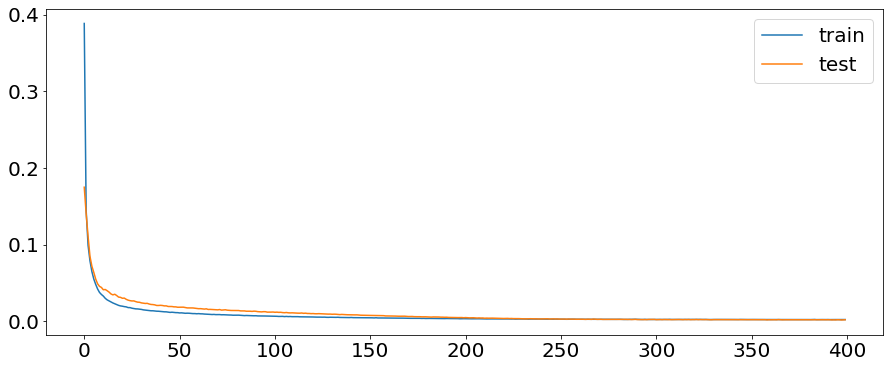

In [8]:
rcParams['figure.figsize'] = 15, 6
rcParams['font.size'] = 20

pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

# Define an encoder model (without the decoder)

<div class="alert alert-info">
<font color=black>

- From the model diagnostic we can be sure the model has no overfitted the data.
- We can now save just the **trained** encoder as `encoder.h5` so we can load-and-sued withouth retraining it again.
- Recall that we can use the encoder (input->bottleneck) as a datapreparation.

</font>
</div>

In [9]:
encoder = Model(inputs=visible, outputs=bottleneck)

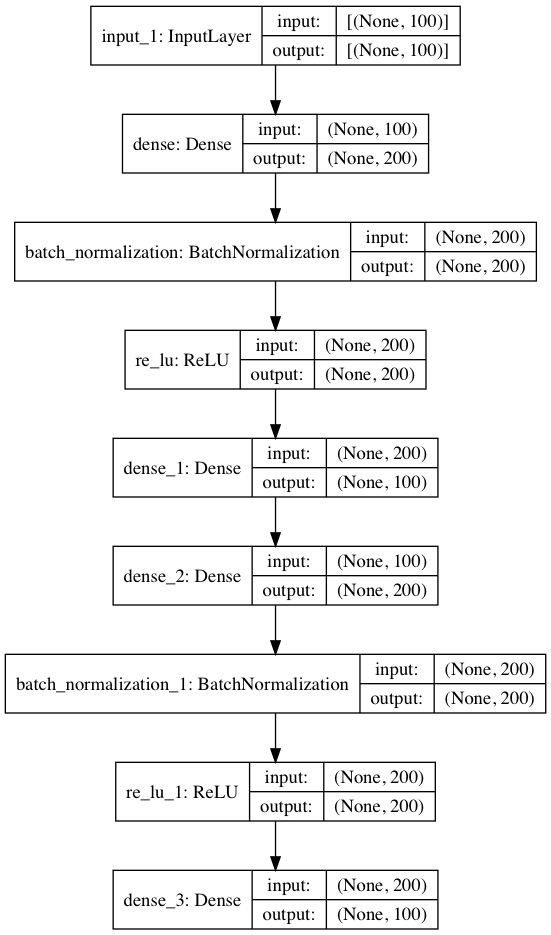

In [10]:
# The whole model
plot_model(model, show_shapes=True)

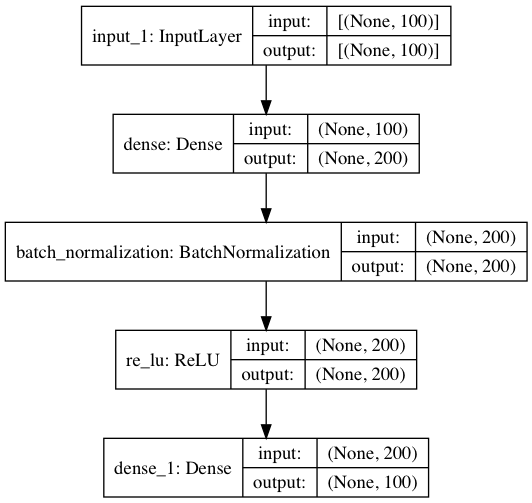

In [11]:
# Just the encoder part
plot_model(encoder, show_shapes=True)

In [12]:
# Dump the encoder
encoder.save('./encoder.h5')

# Build a baseline model
<hr style="border:2px solid black"> </hr>

<div class="alert alert-info">
<font color=black>

- We'd like to use the **trained** encoder to compress the input data and train a different predictive model.

- This is important as if the performance of a model is not improved by the compressed encoding, then the compressed encoding does not add value to the project and should not be used. To do so we'll use a a baseline model to gauge the usefulness of compression the input.

- Out baseline model is based on a SVR model.

</font>
</div>

In [13]:
# define dataset
X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1, random_state=1)
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# reshape target variables so that we can transform them
y_train = y_train.reshape((len(y_train), 1))
y_test = y_test.reshape((len(y_test), 1))
# scale input data
trans_in = MinMaxScaler()
trans_in.fit(X_train)
X_train = trans_in.transform(X_train)
X_test = trans_in.transform(X_test)
# scale output data
trans_out = MinMaxScaler()
trans_out.fit(y_train)
y_train = trans_out.transform(y_train)
y_test = trans_out.transform(y_test)

In [14]:
# define model
model = SVR()
# fit model on the training dataset
model.fit(X_train, y_train)
# make prediction on test set
yhat = model.predict(X_test)
# invert transforms so we can calculate errors
yhat = yhat.reshape((len(yhat), 1))
yhat = trans_out.inverse_transform(yhat)
y_test = trans_out.inverse_transform(y_test)
# calculate error
score = mean_absolute_error(y_test, yhat)
print(score)

89.51082036130629


# Pre-process the data with the encoder
<hr style="border:2px solid black"> </hr>

<div class="alert alert-info">
<font color=black>

- You will see how the input pre-processed by the encoder will reduce the error from `89` donw to somethin `66`.

</font>
</div>

In [15]:
# define dataset
X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1, random_state=1)
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# reshape target variables so that we can transform them
y_train = y_train.reshape((len(y_train), 1))
y_test = y_test.reshape((len(y_test), 1))
# scale input data
trans_in = MinMaxScaler()
trans_in.fit(X_train)
X_train = trans_in.transform(X_train)
X_test = trans_in.transform(X_test)
# scale output data
trans_out = MinMaxScaler()
trans_out.fit(y_train)
y_train = trans_out.transform(y_train)
y_test = trans_out.transform(y_test)

In [16]:
# load the model from file
encoder = load_model('encoder.h5')
# encode the train data
X_train_encode = encoder.predict(X_train)
# encode the test data
X_test_encode = encoder.predict(X_test)
# define model
model = SVR()
# fit model on the training dataset
model.fit(X_train_encode, y_train)
# make prediction on test set
yhat = model.predict(X_test_encode)
# invert transforms so we can calculate errors
yhat = yhat.reshape((len(yhat), 1))
yhat = trans_out.inverse_transform(yhat)
y_test = trans_out.inverse_transform(y_test)
# calculate error
score = mean_absolute_error(y_test, yhat)
print(score)

66.22564115969011


# Some cleanup 
<hr style="border:2px solid black"> </hr>

In [17]:
try:
    os.remove("./encoder.h5")
except:
    pass
try:
    os.remove("./model.png")
except:
    pass

# References
<hr style="border:2px solid black"> </hr>

<div class="alert alert-warning">
<font color=black>

- https://machinelearningmastery.com/autoencoder-for-regression/

</font>
</div>